In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import csv

In [2]:
# Original Data Frame
original_df = pd.read_csv("nutrition-and-health.csv")
original_df

,Series Name,Series Code,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,145.245,145.245,145.245,146.2136,147.1822,148.1508,...,104.8868,98.6322,92.3776,86.123,81.7908,77.4586,73.1264,68.7942,..,..
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,35.7928,32.6304,29.468,28.6554,27.8428,27.0302,...,19.3662,19.8208,20.2754,20.73,20.7174,20.7048,20.6922,20.6796,..,..
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,108.0202,105.6896,103.359,101.6092,99.8594,98.1096,...,10.4346,10.8084,11.1822,11.556,11.2724,10.9888,10.7052,10.4216,..,..
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Angola,AGO,228,228,228,228,228,228,...,175.1394,172.0946,169.0498,166.005,163.1218,160.2386,157.3554,154.4722,..,..
6,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Antigua and Barbuda,ATG,146.1084,140.0432,133.978,127.798,121.618,115.438,...,53.001,51.755,50.509,49.263,48.113,46.963,45.813,44.663,..,..
7,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Arab World,ARB,126.075075760084,123.83897858097,121.764963301069,119.62901998022,117.47265486965,115.235836071937,...,50.1046104372653,49.9001179322243,49.7237574729017,49.5390740285026,49.111244470009,48.6475393890239,48.11455247461,47.4400688914731,..,..
8,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Argentina,ARG,65.1408,66.7214,68.302,71.4412,74.5804,77.7196,...,63.8308,63.8792,63.9276,63.976,63.7388,63.5016,63.2644,63.0272,..,..
9,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Armenia,ARM,41.3496,41.1748,41,40.9598,40.9196,40.8794,...,27.557,27.443,27.329,27.215,26.405,25.595,24.785,23.975,..,..


__GLOBAL MORTALITY RATE (UNDER THE AGE OF 5)__

In [3]:
pd.options.display.max_rows=500
mr_df = original_df[(original_df['Series Name'] == "Mortality rate, under-5 (per 1,000)")]

mr_df.index = range(len(mr_df.index))
mr_df.drop(columns = ['Series Name', 'Series Code'])

,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,Afghanistan,AFG,300.9,295.3,290,283.9,278.2,272.2,266.2,260.2,...,93.9,90,86.2,82.6,79.2,76,73.1,70.4,67.9,..
1,Albania,ALB,..,..,..,..,..,..,..,..,...,12.8,12,11.3,10.7,10.1,9.7,9.4,9.1,8.8,..
2,Algeria,DZA,240,234.9,228.5,221,212.4,203.1,193.4,183.4,...,28.3,27.4,26.7,26.1,25.7,25.3,24.9,24.5,24,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,..,..,..,..,..,..,..,..,...,4,3.9,3.9,3.8,3.7,3.6,3.5,3.4,3.3,..
5,Angola,AGO,..,..,..,..,..,..,..,..,...,130,121.3,113.2,105.8,99.2,93.6,88.9,84.6,81.1,..
6,Antigua and Barbuda,ATG,..,..,..,..,..,..,..,..,...,10.3,9.8,9.5,9.1,8.7,8.3,8,7.7,7.4,..
7,Arab World,ARB,..,..,..,..,..,..,..,..,...,45.0212758247474,43.4889731496392,42.1702435745869,41.0795344730923,40.0062902027704,39.0919830543418,38.2012105185827,37.4480239303103,36.6612018059451,..
8,Argentina,ARG,72.3,71.5,70.3,68.8,66.6,63.9,60.4,56.2,...,15,14.5,13.9,13.3,12.7,12,11.4,10.9,10.4,..
9,Armenia,ARM,..,..,..,..,..,..,88,84.4,...,19,18,17.1,16.3,15.5,14.7,14,13.3,12.6,..


__NORTH AMERICA:__

___UNITED STATES OF AMERICA DATA FRAME ___

In [140]:
# USA DATA -ALL DATA-
pd.options.display.max_rows=500
usa_df = original_df[(original_df['Country Code'] == "USA")]
usa_df

,Series Name,Series Code,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
246,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,United States,USA,63.583,62.482,61.381,59.6534,57.9258,56.1982,...,34.8646,32.5494,30.2342,27.919,26.093,24.267,22.441,20.615,..,..
505,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,United States,USA,..,..,..,..,..,..,...,990000,1000000,1000000,1100000,1100000,1100000,1200000,..,..,..
764,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,United States,USA,..,..,..,..,..,..,...,44000,42000,41000,40000,39000,39000,39000,..,..,..
1023,Adults (ages 15+) living with HIV,SH.DYN.AIDS,United States,USA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1282,Adults (ages 15+) newly infected with HIV,SH.HIV.INCD,United States,USA,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1541,"Age at first marriage, female",SP.DYN.SMAM.FE,United States,USA,21.5,..,..,..,..,..,...,26.9,..,..,..,..,..,..,..,..,..
1800,"Age at first marriage, male",SP.DYN.SMAM.MA,United States,USA,23.5,..,..,..,..,..,...,28.8,..,..,..,..,..,..,..,..,..
2059,Age dependency ratio (% of working-age populat...,SP.POP.DPND,United States,USA,61.7548675552545,60.5178137817121,59.3004417366277,58.0899939393451,56.865256468649,55.6293918781494,...,49.4417545030229,49.5758853584682,49.7700995186633,50.0098349319469,50.3196749076148,50.7077211515286,51.1789017097804,51.6523481467354,52.2682745262177,..
2318,"Age dependency ratio, old",SP.POP.DPND.OL,United States,USA,16.3041360375381,16.4139851511457,16.4958439817412,16.570250661818,16.6441683969139,16.712176780485,...,19.0551555750231,19.4027570843696,19.8333377338469,20.3364803204569,20.8996392436237,21.50196408274,22.1331104149771,22.7955883537936,23.46961267658,..
2577,"Age dependency ratio, young",SP.POP.DPND.YG,United States,USA,45.4507315177165,44.1038286305664,42.8045977548865,41.5197432775271,40.221088071735,38.9172150976644,...,30.3865989279998,30.1731282740986,29.9367617848164,29.67335461149,29.4200356639911,29.2057570687886,29.0457912948033,28.8567597929418,28.7986618496378,..


In [141]:
# USA DATA 1996 - 2016
new_usa_df = usa_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_usa_df.columns = ['Series Name [USA]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
copy_new_usa_df = new_usa_df

In [142]:
# USA DATA 1996 - 2016 (Cleaned)

for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_usa_df = new_usa_df[new_usa_df[i] != ".."]
    
new_usa_df.index = range(len(new_usa_df.index))

IMMUNIZATIONS AND INFANT MORTALITY (IN THE UNITED STATES)

In [143]:
# Immunizations and Infant Mortality

usa_IIM = new_usa_df[(new_usa_df['Series Name [USA]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, HepB3 (% of one-year-old children)") | (new_usa_df['Series Name [USA]'] == "Immunization, Hib3 (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_usa_df['Series Name [USA]'] == "Mortality rate, under-5 (per 1,000)")]
new_usa_IIM = usa_IIM.T
new_usa_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_usa_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)','Immunization, HepB3 (% of one-year-old children)','Immunization, Hib3 (% of children ages 12-23 months)','Immunization, measles (% of children ages 12-23 months)','Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_usa_IIM.index = range(22)
IIM_usa = new_usa_IIM.drop(0)
IIM_usa = IIM_usa.apply(pd.to_numeric)
IIM_usa

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,95,82,91,91,91,9.2
2,1997,96,84,93,91,91,8.9
3,1998,96,87,93,92,91,8.7
4,1999,96,88,94,92,90,8.6
5,2000,94,90,93,91,90,8.4
6,2001,94,89,93,91,89,8.3
7,2002,94,88,93,91,90,8.2
8,2003,96,92,94,93,91,8.1
9,2004,96,92,94,93,92,8.1
10,2005,96,93,94,92,92,8.0


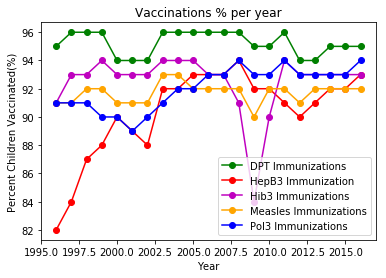

In [144]:
plt.plot(IIM_usa['Year'], IIM_usa['Immunization, DPT (% of children ages 12-23 months)'], color = 'green', marker='o', label = 'DPT Immunizations')
plt.plot(IIM_usa['Year'], IIM_usa['Immunization, HepB3 (% of one-year-old children)'], color = 'red', marker='o', label = 'HepB3 Immunization')
plt.plot(IIM_usa['Year'], IIM_usa['Immunization, Hib3 (% of children ages 12-23 months)'], color = 'm', marker='o', label = 'Hib3 Immunizations')
plt.plot(IIM_usa['Year'], IIM_usa['Immunization, measles (% of children ages 12-23 months)'], color = 'orange',marker='o', label = 'Measles Immunizations')
plt.plot(IIM_usa['Year'], IIM_usa['Immunization, Pol3 (% of one-year-old children)'], color = 'blue',marker='o', label = 'Pol3 Immunizations')
plt.xlabel('Year')
plt.ylabel('Percent Children Vaccinated(%)')
plt.title('Vaccinations % per year')
plt.legend(loc ='lower right')
plt.show()

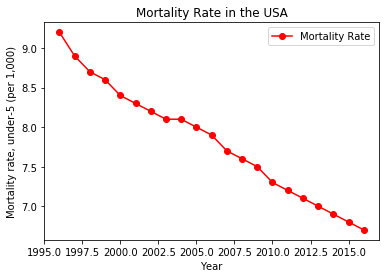

In [145]:
plt.plot(IIM_usa['Year'], IIM_usa['Mortality rate, under-5 (per 1,000)'], color = 'red',  marker='o', label = 'Mortality Rate')
plt.xlabel('Year')
plt.ylabel('Mortality rate, under-5 (per 1,000)')
plt.title('Mortality Rate in the USA')
plt.legend(loc ='upper right')
plt.show()

___CANADA DATA FRAME ___

In [146]:
# CAN DATA -ALL DATA-
can_df = original_df[(original_df['Country Code'] == "CAN")]

In [147]:
# CAN DATA 1996 - 2016

new_can_df = can_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_can_df.columns = ['Series Name [CAN]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
new_can_df.index = range(len(new_can_df.index))
copy_new_can_df = new_can_df

In [148]:
# CAN DATA 1996 - 2016 (Cleaned)
for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_can_df = new_can_df[new_can_df[i] != ".."]
    
new_can_df.index = range(len(new_can_df.index))

IMMUNIZATIONS AND INFANT MORTALITY (IN CANADA)

In [149]:
can_IIM = new_can_df[(new_can_df['Series Name [CAN]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, Hib3 (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_can_df['Series Name [CAN]'] == "Mortality rate, under-5 (per 1,000)")]
new_can_IIM = can_IIM.T
new_can_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_can_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)','Immunization, Hib3 (% of children ages 12-23 months)','Immunization, measles (% of children ages 12-23 months)','Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_can_IIM.index = range(22)
IIM_can = new_can_IIM.drop(0)
IIM_can = IIM_can.apply(pd.to_numeric)
IIM_can

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,90,84,97,89,6.7
2,1997,86,87,96,88,6.5
3,1998,90,88,96,88,6.4
4,1999,90,88,96,88,6.3
5,2000,89,88,96,88,6.2
6,2001,89,88,95,88,6.2
7,2002,88,88,95,88,6.1
8,2003,91,88,95,88,6.1
9,2004,91,91,94,91,6.1
10,2005,93,93,94,93,6.1


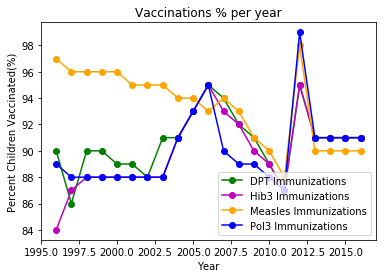

In [150]:
plt.plot(IIM_can['Year'], IIM_can['Immunization, DPT (% of children ages 12-23 months)'], color = 'g', marker='o', label = 'DPT Immunizations')
plt.plot(IIM_can['Year'], IIM_can['Immunization, Hib3 (% of children ages 12-23 months)'], color = 'm',marker='o', label = 'Hib3 Immunizations')
plt.plot(IIM_can['Year'], IIM_can['Immunization, measles (% of children ages 12-23 months)'], color = 'orange',marker='o', label = 'Measles Immunizations')
plt.plot(IIM_can['Year'], IIM_can['Immunization, Pol3 (% of one-year-old children)'], color = 'blue',marker='o', label = 'Pol3 Immunizations')
plt.xlabel('Year')
plt.ylabel('Percent Children Vaccinated(%)')
plt.title('Vaccinations % per year')
plt.legend(loc ='lower right')
plt.show()

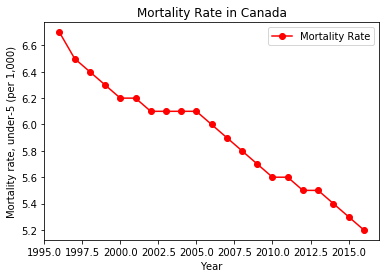

In [151]:
plt.plot(IIM_can['Year'], IIM_can['Mortality rate, under-5 (per 1,000)'], color = 'red',marker='o', label = 'Mortality Rate')
plt.xlabel('Year')
plt.ylabel('Mortality rate, under-5 (per 1,000)')
plt.title('Mortality Rate in Canada')
plt.legend(loc ='upper right')
plt.show()

__SOUTH AMERICA__

____MEXICO DATA FRAME____

In [152]:
mex_df = original_df[(original_df['Country Code'] == "MEX")]

In [153]:
# MEX DATA 1996 - 2016

new_mex_df = mex_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_mex_df.columns = ['Series Name [MEX]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
new_mex_df.index = range(len(new_mex_df.index))
copy_mex_df = new_mex_df

In [154]:
# MEX DATA 1996 - 2016 (Cleaned)
for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_mex_df = new_mex_df[new_mex_df[i] != ".."]
    
new_mex_df.index = range(len(new_mex_df.index))

IMMUNIZATIONS AND INFANT MORTALITY (IN MEXICO)

In [155]:
# Immunizations and Infant Mortality

mex_IIM = new_mex_df[(new_mex_df['Series Name [MEX]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_mex_df['Series Name [MEX]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_mex_df['Series Name [MEX]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_mex_df['Series Name [MEX]'] == "Mortality rate, under-5 (per 1,000)")]
new_mex_IIM = mex_IIM.T
new_mex_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_mex_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)', 'Immunization, measles (% of children ages 12-23 months)','Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_mex_IIM.index = range(22)
IIM_mex = new_mex_IIM.drop(0)
IIM_mex = IIM_mex.apply(pd.to_numeric)
IIM_mex

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,95,93,95,33.5
2,1997,95,91,95,31.8
3,1998,96,96,96,30.0
4,1999,96,94,96,28.3
5,2000,97,96,97,26.8
6,2001,97,95,97,25.3
7,2002,97,96,98,23.9
8,2003,98,96,98,22.7
9,2004,98,96,98,21.6
10,2005,98,96,98,20.6


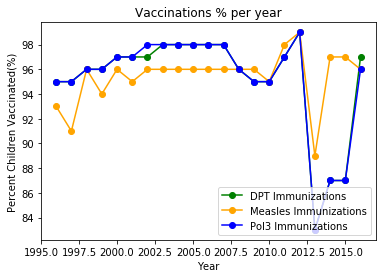

In [156]:
plt.plot(IIM_mex['Year'], IIM_mex['Immunization, DPT (% of children ages 12-23 months)'], color = 'g', marker='o', label = 'DPT Immunizations')
plt.plot(IIM_mex['Year'], IIM_mex['Immunization, measles (% of children ages 12-23 months)'], color = 'orange',  marker='o', label = 'Measles Immunizations')
plt.plot(IIM_mex['Year'], IIM_mex['Immunization, Pol3 (% of one-year-old children)'], color = 'blue', marker='o', label = 'Pol3 Immunizations')
plt.xlabel('Year')
plt.ylabel('Percent Children Vaccinated(%)')
plt.title('Vaccinations % per year')
plt.legend(loc ='lower right')
plt.show()

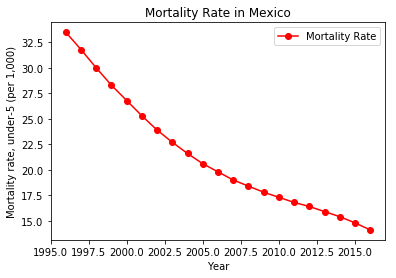

In [157]:
plt.plot(IIM_mex['Year'], IIM_mex['Mortality rate, under-5 (per 1,000)'], color = 'red', marker='o', label = 'Mortality Rate')
plt.xlabel('Year')
plt.ylabel('Mortality rate, under-5 (per 1,000)')
plt.title('Mortality Rate in Mexico')
plt.legend(loc ='upper right')
plt.show()

___BRAZIL DATA FRAME___

In [158]:
bra_df = original_df[(original_df['Country Code'] == "BRA")]

In [159]:
new_bra_df = bra_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_bra_df.columns = ['Series Name [BRA]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
new_bra_df.index = range(len(new_bra_df.index))
copy_bra_df = new_bra_df

In [160]:
# BRA DATA 1996 - 2016 (Cleaned)
for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_bra_df = new_bra_df[new_bra_df[i] != ".."]
    
new_bra_df.index = range(len(new_bra_df.index))

In [161]:
# Immunizations and Infant Mortality

bra_IIM = new_bra_df[(new_bra_df['Series Name [BRA]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_bra_df['Series Name [BRA]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_bra_df['Series Name [BRA]'] == "Immunization, HepB3 (% of one-year-old children)") | (new_bra_df['Series Name [BRA]'] == "Mortality rate, under-5 (per 1,000)")]
new_bra_IIM = bra_IIM.T
new_bra_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_bra_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)', 'Immunization, measles (% of children ages 12-23 months)','Immunization, HepB3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_bra_IIM.index = range(22)
IIM_bra = new_bra_IIM.drop(0)
IIM_bra = IIM_bra.apply(pd.to_numeric)
IIM_bra

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,77,15,80,44.9
2,1997,79,6,99,42.1
3,1998,93,13,95,39.5
4,1999,94,84,99,37.0
5,2000,98,94,99,34.7
6,2001,98,91,99,32.5
7,2002,99,92,96,30.5
8,2003,99,97,97,28.5
9,2004,99,96,97,26.6
10,2005,99,98,98,24.9


__BOOTSTRAP (USA AND CAN)__

In [162]:
#USA
usa_label = usa_df[['Country Code']]
usa_label.index = range(len(usa_label.index))
usa_label_new = usa_label.loc[1:21]
usa_boot = usa_label_new.join(IIM_usa[['Mortality rate, under-5 (per 1,000)']])

In [163]:
#CAN
can_label = can_df[['Country Code']]
can_label.index = range(len(can_label.index))
can_label_new = can_label.loc[1:21]
can_boot = can_label_new.join(IIM_can[['Mortality rate, under-5 (per 1,000)']])

In [164]:
#USA and CAN (JOINED)
usa_and_can_boot = usa_boot.append(can_boot)
usa_and_can_boot.index = range(len(usa_and_can_boot.index))

In [165]:
#USA and CAN Mortality Rates
usa_mortality = usa_and_can_boot[usa_and_can_boot['Country Code'] == 'USA']['Mortality rate, under-5 (per 1,000)']
can_mortality = usa_and_can_boot[usa_and_can_boot['Country Code'] == 'CAN']['Mortality rate, under-5 (per 1,000)']

In [166]:
uscan_observed_distance = np.mean(usa_mortality) - np.mean(can_mortality)
uscan_observed_distance

1.9047619047619042

In [167]:
def shuffle(series):
    '''
    Shuffles a series and resets index to preserve shuffle when adding series
    back to DataFrame.
    '''
    return series.sample(frac=1, replace=False).reset_index(drop=True)

In [168]:
#Permutation Test (USA AND CAN)
uscan_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    usa_and_can_boot["Shuffled"] = shuffle(usa_and_can_boot['Mortality rate, under-5 (per 1,000)'])
  
    # Find the difference between the means of two randomly assigned groups
    usa_mr = usa_and_can_boot[usa_and_can_boot['Country Code'] == 'USA']['Shuffled']
    can_mr = usa_and_can_boot[usa_and_can_boot['Country Code'] == 'CAN']['Shuffled']
    simulated_difference = np.mean(usa_mr) - np.mean(can_mr)

    uscan_differences = np.append(uscan_differences, simulated_difference)

In [169]:
uscan_differences

array([ 0.4952381 , -0.27619048,  0.28571429, ..., -0.40952381,
       -0.13333333,  0.07619048])

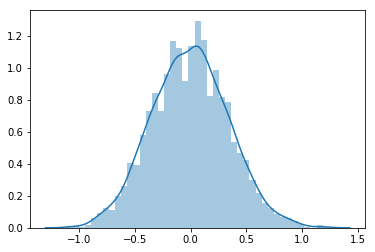

In [170]:
sns.distplot(uscan_differences)

In [171]:
uscan_p_value = np.count_nonzero(uscan_differences >= uscan_observed_distance) / repetitions
uscan_p_value

0.0

__BOOTSTRAP (MEX AND BRA)__

In [172]:
#MEX
mex_label = mex_df[['Country Code']]
mex_label.index = range(len(mex_label.index))
mex_label_new = mex_label.loc[1:21]
mex_boot = mex_label_new.join(IIM_mex[['Mortality rate, under-5 (per 1,000)']])

In [173]:
#BRA
bra_label = bra_df[['Country Code']]
bra_label.index = range(len(bra_label.index))
bra_label_new = bra_label.loc[1:21]
bra_boot = bra_label_new.join(IIM_bra[['Mortality rate, under-5 (per 1,000)']])

In [174]:
#MEX and BRA (JOINED)
mex_and_bra_boot = mex_boot.append(bra_boot)
mex_and_bra_boot.index = range(len(mex_and_bra_boot.index))

In [175]:
#MEX and BRA Mortality Rates
mex_mortality = mex_and_bra_boot[mex_and_bra_boot['Country Code'] == 'MEX']['Mortality rate, under-5 (per 1,000)']
bra_mortality = mex_and_bra_boot[mex_and_bra_boot['Country Code'] == 'BRA']['Mortality rate, under-5 (per 1,000)']

In [176]:
mexbra_observed_distance = np.mean(mex_mortality) - np.mean(bra_mortality)
np.absolute(mexbra_observed_distance)

4.538095238095238

In [177]:
#Permutation Test (MEX AND BRA)
mexbra_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    mex_and_bra_boot["Shuffled"] = shuffle(mex_and_bra_boot['Mortality rate, under-5 (per 1,000)'])
  
    # Find the difference between the means of two randomly assigned groups
    mex_mr = mex_and_bra_boot[mex_and_bra_boot['Country Code'] == 'MEX']['Shuffled']
    bra_mr = mex_and_bra_boot[mex_and_bra_boot['Country Code'] == 'BRA']['Shuffled']
    simulated_difference = np.mean(mex_mr) - np.mean(bra_mr)

    mexbra_differences = np.append(mexbra_differences, simulated_difference)

In [178]:
mexbra_differences

array([ 1.93809524, -0.66190476,  2.08095238, ...,  4.54761905,
        0.26190476, -2.1952381 ])

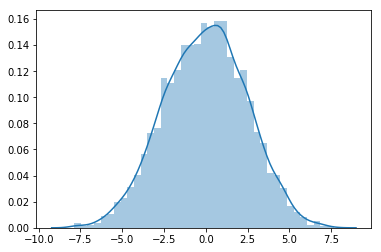

In [179]:
sns.distplot(mexbra_differences)

In [180]:
mexbra_p_value = np.count_nonzero(mexbra_differences >= np.absolute(mexbra_observed_distance)) / repetitions
mexbra_p_value

0.0288

__DIFFERENCES BOOTSTRAP__

In [181]:
mex_diff_df = mex_label.loc[0:19]
mex_diff_df['Difference in Mortality Rate for each year'] = np.diff(mex_boot['Mortality rate, under-5 (per 1,000)'])

c:\users\travi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [182]:
bra_diff_df = bra_label.loc[0:19]
bra_diff_df['Difference in Mortality Rate for each year'] = np.diff(bra_boot['Mortality rate, under-5 (per 1,000)'])

c:\users\travi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
mexbra_diff = mex_diff_df.append(bra_diff_df)
mexbra_diff.index = range(len(mexbra_diff.index))

In [184]:
#MEX and BRA Mortality Rates Differences
mex_mortality_diff = mexbra_diff[mexbra_diff['Country Code'] == 'MEX']['Difference in Mortality Rate for each year']
bra_mortality_diff = mexbra_diff[mexbra_diff['Country Code'] == 'BRA']['Difference in Mortality Rate for each year']

In [185]:
mexbra_diff_observed_distance = np.mean(mex_mortality_diff) - np.mean(bra_mortality_diff)
np.absolute(mexbra_diff_observed_distance)

0.45999999999999963

In [186]:
#Permutation Test (MEX AND BRA)
mexbra_diff_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    mexbra_diff["Shuffled"] = shuffle(mexbra_diff['Difference in Mortality Rate for each year'])
  
    # Find the difference between the means of two randomly assigned groups
    mex_mr_diff = mexbra_diff[mexbra_diff['Country Code'] == 'MEX']['Shuffled']
    bra_mr_diff = mexbra_diff[mexbra_diff['Country Code'] == 'BRA']['Shuffled']
    diff_simulated_difference = np.mean(mex_mr_diff) - np.mean(bra_mr_diff)

    mexbra_diff_differences = np.append(mexbra_diff_differences, diff_simulated_difference)

In [187]:
mexbra_diff_differences

array([ 0.33, -0.04,  0.21, ..., -0.38,  0.24, -0.38])

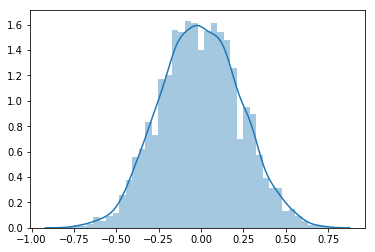

In [188]:
sns.distplot(mexbra_diff_differences)

In [189]:
mexbra_diff_p_value = np.count_nonzero(mexbra_diff_differences >= np.absolute(mexbra_diff_observed_distance)) / repetitions
mexbra_diff_p_value

0.0262